In [4]:
from keras.layers import Input, Lambda, Dense , Flatten 
from keras.models import Model 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)

In [5]:
IMAGE_SIZE=[224,224]

In [6]:
# define dataset path 
train_path="/kaggle/input/skin-cancer-malignant-vs-benign/train"
test_path="/kaggle/input/skin-cancer-malignant-vs-benign/test"

In [7]:
from PIL import Image
import os 
from IPython.display import display 
from IPython.display import Image as _Imgdis

Working with 1440 images
Image Examples : 
764.jpg


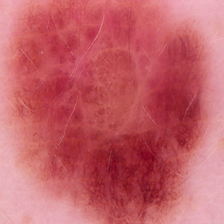

1700.jpg


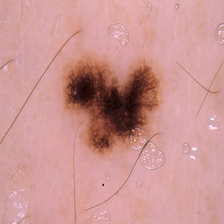

1786.jpg


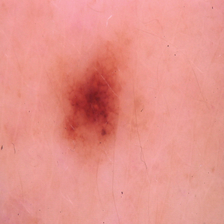

1075.jpg


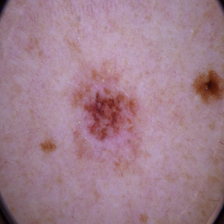

771.jpg


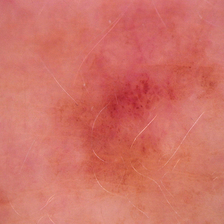

208.jpg


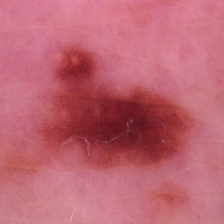

1789.jpg


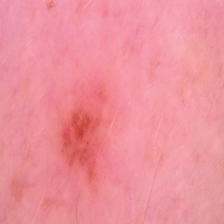

473.jpg


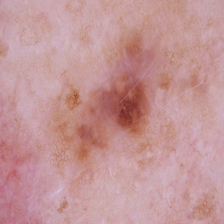

1792.jpg


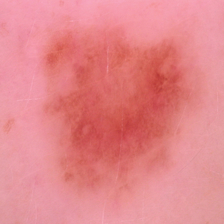

1411.jpg


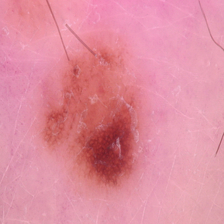

In [8]:
folder=train_path+'/benign' # path for benign images folder 

# in the onlybenignfiles list all the images file names in the benign folder is stored 
onlybenignfiles=[f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print("Working with {} images".format(len(onlybenignfiles)))
print("Image Examples : ")

for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder+"/"+onlybenignfiles[i],width=240,height=240))

In [9]:
print(onlybenignfiles[0:10])
print(len(onlybenignfiles))

['764.jpg', '1700.jpg', '1786.jpg', '1075.jpg', '771.jpg', '208.jpg', '1789.jpg', '473.jpg', '1792.jpg', '1411.jpg']
1440


Working with 1197 images
Image Examples : 
1269.jpg


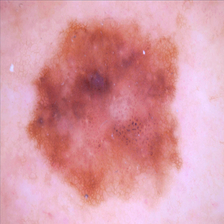

623.jpg


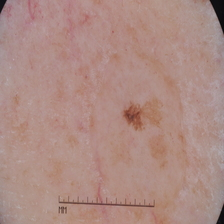

764.jpg


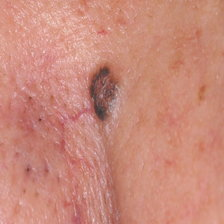

1075.jpg


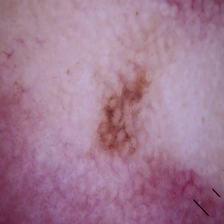

820.jpg


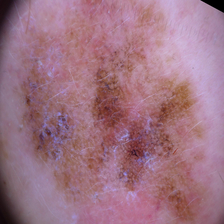

473.jpg


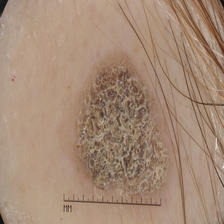

1411.jpg


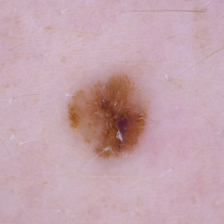

1031.jpg


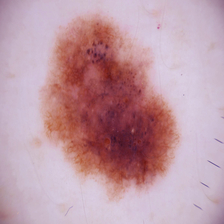

1385.jpg


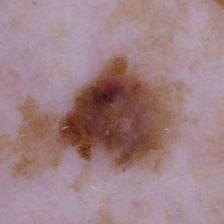

333.jpg


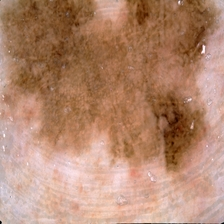

In [11]:
folder_2=train_path+'/malignant' # path for malignant images folder 

# in the onlymalfiles list all the images file names in the benign folder is stored 
onlymalfiles=[f for f in os.listdir(folder_2) if os.path.isfile(os.path.join(folder_2,f))]
print("Working with {} images".format(len(onlymalfiles)))
print("Image Examples : ")

for i in range(10):
    print(onlymalfiles[i])
    display(_Imgdis(filename=folder_2+"/"+onlymalfiles[i],width=240,height=240))

In [12]:
# importing the vgg model
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
# the final input shape for vgg16 is (224,224,3) the 3 is the number of channels 
# the inlcude_top=False indicates to remove the final fully connected layers 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_76>

In [14]:
for layer in vgg.layers:
    layer.trainable=False 

In [15]:
folders=glob("/kaggle/input/skin-cancer-malignant-vs-benign/train/*")
print(len(folders))

2


In [16]:
folders

['/kaggle/input/skin-cancer-malignant-vs-benign/train/benign',
 '/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant']

In [17]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
from keras import optimizers 

adam=optimizers.Adam()
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])

In [19]:
# this is for data augmentation , ImageDataGenerator performs real time data augmentation 
# preprocess_input is specific to the pre trained model being used 
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

In [20]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

In [21]:
train_set=train_datagen.flow_from_directory(train_path,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 2637 images belonging to 2 classes.


In [22]:
test_set= test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [24]:
from datetime import datetime 
from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint(filepath='mymodel.keras',
                          verbose=2,
                          save_best_only=True)
callbacks=[checkpoint]
start=datetime.now()

model_history=model.fit(train_set,
                                 validation_data=test_set,
                                 epochs=10,
                                 steps_per_epoch=5,
                                 validation_steps=32,
                                 callbacks=callbacks,
                                 verbose=2)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726243634.253110      73 service.cc:145] XLA service 0x783ca800f8e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726243634.253171      73 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1726243643.461975      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 3.33111, saving model to mymodel.keras


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 - 35s - 7s/step - accuracy: 0.5813 - loss: 3.3193 - val_accuracy: 0.6803 - val_loss: 3.3311
Epoch 2/10

Epoch 2: val_loss did not improve from 3.33111
5/5 - 11s - 2s/step - accuracy: 0.7125 - loss: 3.1324 - val_accuracy: 0.6924 - val_loss: 3.9533
Epoch 3/10

Epoch 3: val_loss improved from 3.33111 to 2.16901, saving model to mymodel.keras
5/5 - 10s - 2s/step - accuracy: 0.7875 - loss: 2.8329 - val_accuracy: 0.7879 - val_loss: 2.1690
Epoch 4/10

Epoch 4: val_loss did not improve from 2.16901
5/5 - 10s - 2s/step - accuracy: 0.8562 - loss: 1.5314 - val_accuracy: 0.8061 - val_loss: 2.2853
Epoch 5/10

Epoch 5: val_loss improved from 2.16901 to 2.02681, saving model to mymodel.keras
5/5 - 10s - 2s/step - accuracy: 0.7875 - loss: 2.3704 - val_accuracy: 0.8076 - val_loss: 2.0268
Epoch 6/10

Epoch 6: val_loss improved from 2.02681 to 1.96795, saving model to mymodel.keras
5/5 - 10s - 2s/step - accuracy: 0.8188 - loss: 1.7978 - val_accuracy: 0.7894 - val_loss: 1.9680
Epoch 7/10

Epoch 7: val

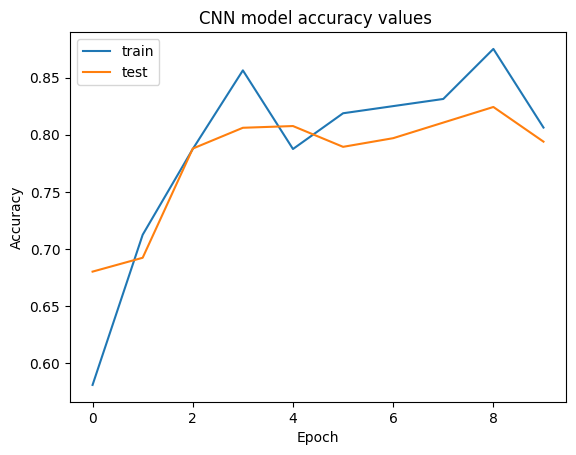

In [26]:
# plot model training and validation loss values 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("CNN model accuracy values ")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train","test"],loc='upper left')
plt.show()